In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import ttest_ind

# For better plots
sns.set(style="whitegrid")

In [2]:
ic50_data = pd.read_csv('cancer_cell_line_data1.csv', encoding="latin1")  

print("IC50 Data Shape:", ic50_data.shape)

ic50_data.head()

IC50 Data Shape: (2425, 8)


,Drugs,Cell line,TCGA classification,Tissue,Tissue sub-type,IC50,AUC,Smiles
0,Paclitaxel,LC-2-ad,LUAD,lung,lung_NSCLC_adenocarcinoma,0.001262,0.256296,CC1=C2[C@H](C(=O)[C@@]3([C@H](C[C@@H]4[C@]([C@...
1,NaN,TE-15,ESCA,aero_digestive_tract,oesophagus,0.001272,0.271805,NaN
2,NaN,PSN1,PAAD,pancreas,pancreas,0.001334,0.242556,NaN
3,NaN,TE-11,ESCA,aero_digestive_tract,oesophagus,0.001370,0.259042,NaN
4,NaN,MZ1-PC,PAAD,pancreas,pancreas,0.001675,0.307640,NaN


In [3]:
lung_cell_lines = ic50_data[ic50_data['Tissue'].str.lower() == 'lung']

print("Lung Cell line Shape:", lung_cell_lines.shape)

# Print all lung cell line rows
print(lung_cell_lines.to_string(index=False))


Lung Cell line Shape: (223, 8)
       Drugs     Cell line TCGA classification Tissue                    Tissue sub-type      IC50      AUC                                                                                                                                                                        Smiles
   Paclitaxel      LC-2-ad                LUAD   lung          lung_NSCLC_adenocarcinoma  0.001262 0.256296 CC1=C2[C@H](C(=O)[C@@]3([C@H](C[C@@H]4[C@]([C@H]3[C@@H]([C@@](C2(C)C)(C[C@@H]1OC(=O)[C@@H]([C@H](C5=CC=CC=C5)NC(=O)C6=CC=CC=C6)O)O)OC(=O)C7=CC=CC=C7)(CO4)OC(=O)C)O)C)OC(=O)C
          NaN      LXF-289                LUAD   lung          lung_NSCLC_adenocarcinoma  0.002533 0.355323                                                                                                                                                                           NaN
          NaN        IA-LM        UNCLASSIFIED   lung              lung_NSCLC_large_cell  0.003567 0.414158                

In [4]:
ic50_data.columns = ic50_data.columns.str.strip()

In [5]:
lung_cell_lines = ic50_data[ic50_data['Tissue'].str.lower() == 'lung']

In [6]:
ic50_lung_avg = lung_cell_lines.groupby(['Cell line', 'Drugs'], as_index=False)['IC50'].mean()
pivot_table = ic50_lung_avg.pivot(index='Drugs', columns='Cell line', values='IC50')

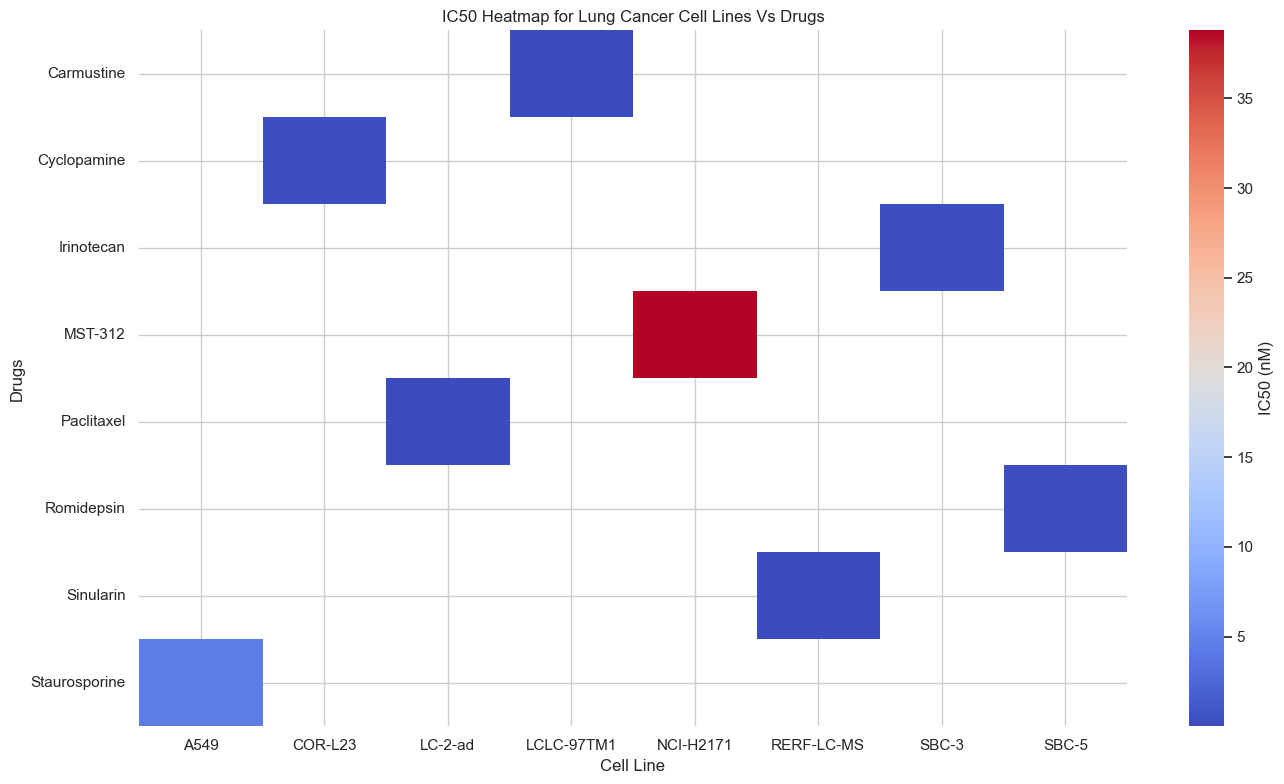

In [8]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(14, 8))
sns.heatmap(pivot_table, annot=False, cmap="coolwarm", fmt=".1f", cbar_kws={'label': 'IC50 (nM)'})
plt.title('IC50 Heatmap for Lung Cancer Cell Lines Vs Drugs')
plt.xlabel('Cell Line')
plt.ylabel('Drugs')
plt.tight_layout()

# Save as PNG
plt.savefig("IC50_Heatmap_LungCancer.png", dpi=300, bbox_inches='tight')

# Save as TIFF
plt.savefig("IC50_Heatmap_LungCancer.tiff", dpi=300, format='tiff', bbox_inches='tight')

plt.show()


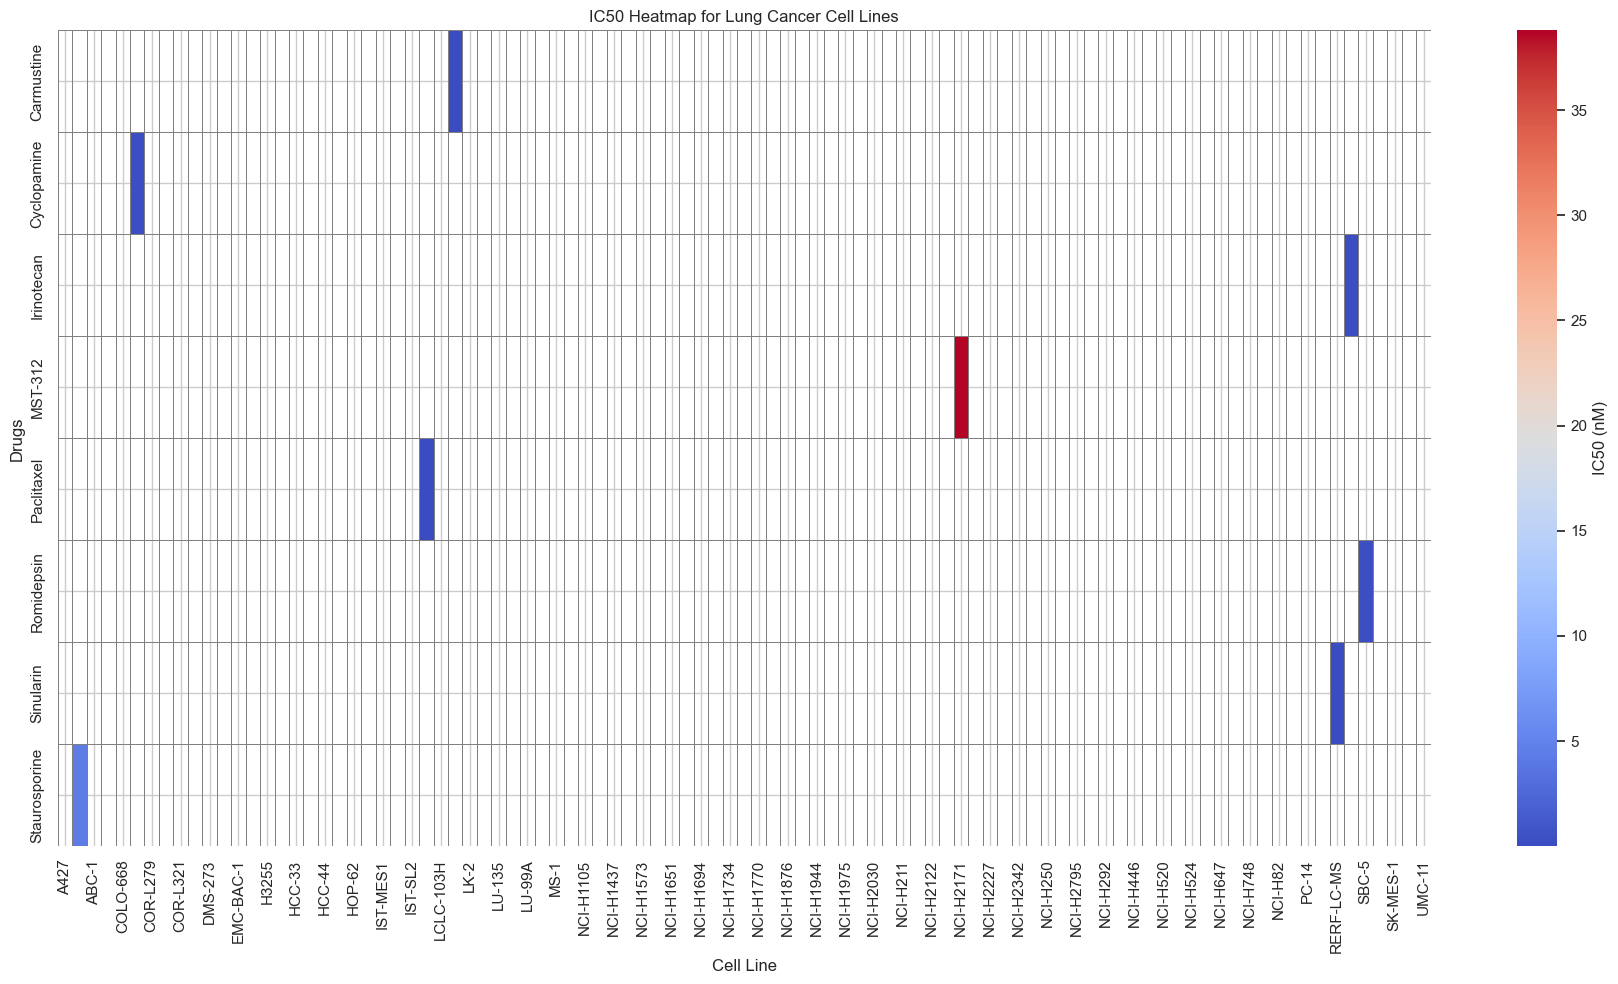

In [9]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Filter lung tissue data
lung_system = ic50_data[ic50_data['Tissue'].str.lower() == 'lung']

# Get unique lung system cell lines
cell_lines = lung_system['Cell line'].unique()

# Calculate average IC50 per drug-cell line pair
ic50_avg = lung_system.groupby(['Drugs', 'Cell line'], as_index=False)['IC50'].mean()

# Pivot into heatmap format
pivot_table = ic50_avg.pivot(index='Drugs', columns='Cell line', values='IC50')

# Ensure all cell lines appear on x-axis
pivot_table = pivot_table.reindex(columns=sorted(cell_lines))

# Plot heatmap
plt.figure(figsize=(18, 10))
sns.heatmap(pivot_table, annot=False, cmap='coolwarm', cbar_kws={'label': 'IC50 (nM)'}, linewidths=0.5, linecolor='gray')

plt.title('IC50 Heatmap for Lung Cancer Cell Lines')
plt.xlabel('Cell Line')
plt.ylabel('Drugs')
plt.xticks(rotation=90)
plt.tight_layout()
# Save the plot
plt.savefig('lung_ic50_heatmap.png', dpi=300)
plt.savefig('lung_ic50_heatmap.tiff', dpi=300)
plt.show()


In [10]:
# Step 1: Load Mutation Data
mutation_data = pd.read_csv('mutations_all_20250318.csv')

In [11]:
target_genes = [
    "TP53", "KRAS", "EGFR", "STK11", "KEAP1", "PIK3CA", "CDKN2A", "NF1", "RB1", "SMARCA4",
    "BRAF", "MET", "ARID1A", "NFE2L2", "ROS1", "ERBB2", "FGFR1", "FGFR3", "ALK", "PTEN",
    "MYC", "NOTCH1", "EP300", "KMT2D", "KMT2C", "ERBB4", "MAP2K1", "CDKN2B", "APC", "HRAS",
    "MGA", "RIT1", "TERT", "AKT1", "LRP1B", "ZFHX3", "SETD2", "ASXL1", "CUL3", "CREBBP",
    "RUNX1", "MLLT4", "PTPRD", "ATM", "FGF19", "FGF3", "FGF4", "MTOR", "CHD8", "CCND1"
]

# Step 1: Rename model_name to Cell_line (if not already done)
mutation_data.rename(columns={'model_name': 'Cell_line'}, inplace=True)

# Step 2: Store mutation info for each gene
mutation_results = []

# Step 3: Check for each gene
for gene in target_genes:
    gene_mutation = mutation_data[mutation_data['gene_symbol'] == gene]
    gene_mutated_cell_lines = gene_mutation['Cell_line'].unique().tolist()
    mutation_results.append({
        'Gene': gene,
        'Mutated Cell Lines': gene_mutated_cell_lines,
        'Count': len(gene_mutated_cell_lines)
    })

# Step 4: Convert to DataFrame
mutation_summary = pd.DataFrame(mutation_results)

# Optional: Sort by mutation count
mutation_summary = mutation_summary.sort_values(by='Count', ascending=False)

# Display result
mutation_summary.head()

,Gene,Mutated Cell Lines,Count
24,KMT2C,"[HCM-SANG-0524-C20, HCM-SANG-0527-C18, HCM-SAN...",227
0,TP53,"[HCM-SANG-0524-C20, HCM-SANG-0527-C18, HCM-SAN...",184
34,LRP1B,"[HCM-SANG-0524-C20, HCM-SANG-0286-C20, HCM-SAN...",166
43,ATM,"[HCM-SANG-0275-C18, HCM-SANG-0310-C15, HCM-SAN...",147
42,PTPRD,"[HCM-SANG-0295-C15, HCM-SANG-0314-C15, KP-1N, ...",140


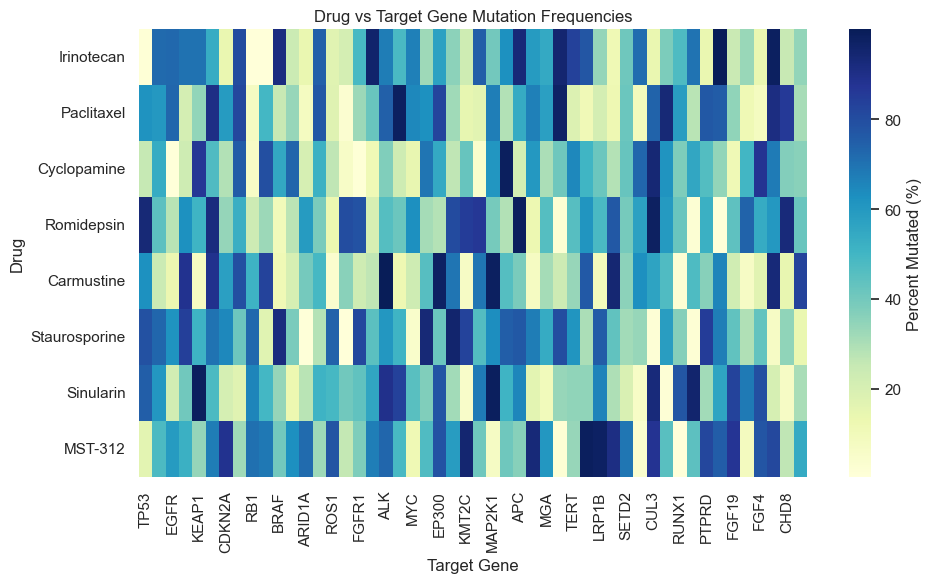

In [12]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

# Define the list of drugs
drugs = [
     'Irinotecan', 'Paclitaxel',
    'Cyclopamine',  'Romidepsin', 
    'Carmustine', 'Staurosporine',  'Sinularin', 'MST-312'
]

target_genes = [  "TP53", "KRAS", "EGFR", "STK11", "KEAP1", "PIK3CA", "CDKN2A", "NF1", "RB1", "SMARCA4",
    "BRAF", "MET", "ARID1A", "NFE2L2", "ROS1", "ERBB2", "FGFR1", "FGFR3", "ALK", "PTEN",
    "MYC", "NOTCH1", "EP300", "KMT2D", "KMT2C", "ERBB4", "MAP2K1", "CDKN2B", "APC", "HRAS",
    "MGA", "RIT1", "TERT", "AKT1", "LRP1B", "ZFHX3", "SETD2", "ASXL1", "CUL3", "CREBBP",
    "RUNX1", "MLLT4", "PTPRD", "ATM", "FGF19", "FGF3", "FGF4", "MTOR", "CHD8", "CCND1"]  # List of target genes

# Create random mutation data (you should replace this with your actual mutation data)
# This matrix should be of shape (len(drugs), len(target_genes))
data = np.random.rand(len(drugs), len(target_genes)) * 100  # Example data as percentages

# Create DataFrame
df = pd.DataFrame(data, columns=target_genes, index=drugs)

# Plotting a heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(df, annot=False, cmap="YlGnBu", fmt=".1f", cbar_kws={'label': 'Percent Mutated (%)'})

# Titles and labels
plt.title('Drug vs Target Gene Mutation Frequencies')
plt.xlabel('Target Gene')
plt.ylabel('Drug')
# Save the plot as PDF
plt.tight_layout()
plt.savefig("drug_gene_mutation_heatmap.png", format="pdf")

# Show plot
plt.tight_layout()
plt.show()

In [13]:
import pandas as pd

# Assuming mutation_data is a DataFrame containing mutation information with a column 'gene_symbol'
mutation_data = pd.read_csv('mutations_all_20250318.csv')  # Replace with your data source

# List of target genes
target_genes = [
     "TP53", "KRAS", "EGFR", "STK11", "KEAP1", "PIK3CA", "CDKN2A", "NF1", "RB1", "SMARCA4",
    "BRAF", "MET", "ARID1A", "NFE2L2", "ROS1", "ERBB2", "FGFR1", "FGFR3", "ALK", "PTEN",
    "MYC", "NOTCH1", "EP300", "KMT2D", "KMT2C", "ERBB4", "MAP2K1", "CDKN2B", "APC", "HRAS",
    "MGA", "RIT1", "TERT", "AKT1", "LRP1B", "ZFHX3", "SETD2", "ASXL1", "CUL3", "CREBBP",
    "RUNX1", "MLLT4", "PTPRD", "ATM", "FGF19", "FGF3", "FGF4", "MTOR", "CHD8", "CCND1"
]

# Filter mutation data to find rows where gene_symbol is in target_genes list
filtered_mutation_data = mutation_data[mutation_data['gene_symbol'].isin(target_genes)]

# Display filtered data
print(filtered_mutation_data)

# Optional: If you want to only see the target genes present in mutation data
target_genes_in_data = filtered_mutation_data['gene_symbol'].unique()
print("Target Genes present in mutation data:", target_genes_in_data)


        gene_symbol  ensembl_gene_id transcript_id             model_name  \
9            NOTCH1  ENSG00000148400           NaN      HCM-SANG-0520-C18   
16           ARID1A  ENSG00000117713           NaN      HCM-SANG-0270-C20   
17           ARID1A  ENSG00000117713           NaN      HCM-SANG-0270-C20   
18           ARID1A  ENSG00000117713           NaN      HCM-SANG-0270-C20   
30            KMT2D  ENSG00000167548           NaN      HCM-SANG-0524-C20   
...             ...              ...           ...                    ...   
1039442      PIK3CA  ENSG00000121879           NaN  Mesobank_CellLine-50T   
1040536       FGFR3  ENSG00000068078           NaN  Mesobank_CellLine-50T   
1046932        TERT  ENSG00000164362           NaN  Mesobank_CellLine-50T   
1046933        TERT  ENSG00000164362           NaN  Mesobank_CellLine-50T   
1046935        TERT  ENSG00000164362           NaN  Mesobank_CellLine-50T   

          model_id protein_mutation      rna_mutation     cdna_mutation  \


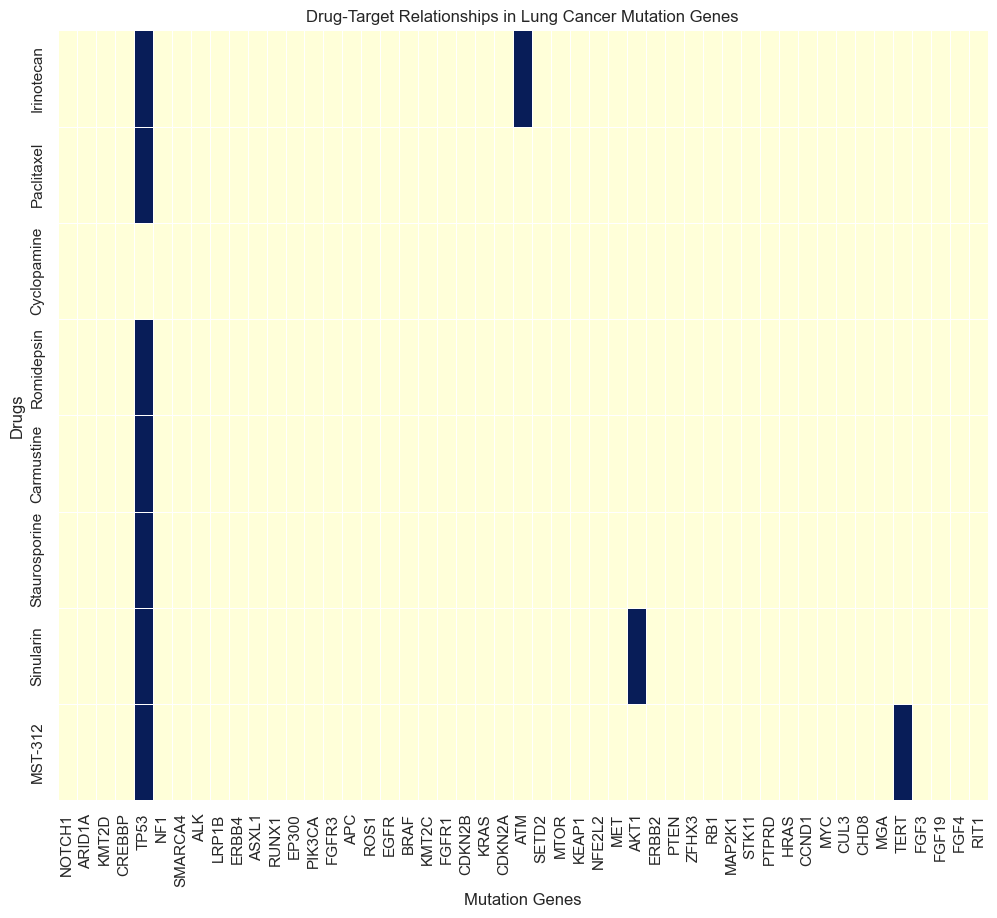

In [14]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

# List of target genes present in mutation data
target_genes_present = ['NOTCH1', 'ARID1A', 'KMT2D', 'CREBBP', 'TP53', 'NF1', 'SMARCA4', 'ALK', 'LRP1B',
 'ERBB4', 'ASXL1', 'RUNX1', 'EP300', 'PIK3CA', 'FGFR3', 'APC', 'ROS1', 'EGFR',
 'BRAF', 'KMT2C', 'FGFR1', 'CDKN2B', 'KRAS', 'CDKN2A', 'ATM', 'SETD2', 'MTOR',
 'KEAP1', 'NFE2L2', 'MET', 'AKT1', 'ERBB2', 'PTEN', 'ZFHX3', 'RB1', 'MAP2K1',
 'STK11' ,'PTPRD', 'HRAS', 'CCND1', 'MYC', 'CUL3', 'CHD8', 'MGA', 'TERT' ,'FGF3',
 'FGF19', 'FGF4', 'RIT1']

drug_target_mapping = {
    'Carmustine': ['MGMT', 'TP53'],
    'Cyclopamine': ['SMO', 'GLI1'],  # Hedgehog pathway
    'Irinotecan': ['TOP1', 'TP53', 'ATM'],
    'MST-312': ['TERT', 'TP53'],  # Telomerase inhibitor
    'Paclitaxel': ['BCL2', 'TP53'],
    'Romidepsin': ['HDAC1', 'TP53'],  # HDAC inhibitor
    'Sinularin': ['AKT1', 'TP53'],  # Marine natural product, ROS/AKT involved
    'Staurosporine': ['PKC', 'TP53'],  # Broad kinase inhibitor
}


# Initialize a DataFrame to store the drug-gene relationship (1 if the drug targets the gene, 0 if not)
drug_target_df = pd.DataFrame(0, index=drugs, columns=target_genes_present)

# Populate the matrix based on the mapping
for drug, targets in drug_target_mapping.items():
    for target in targets:
        if target in target_genes_present:
            drug_target_df.at[drug, target] = 1

# Plot the heatmap with drugs on Y-axis and target genes on X-axis
plt.figure(figsize=(12, 10))
sns.heatmap(drug_target_df, annot=False, cmap='YlGnBu', cbar=False, linewidths=0.5)
plt.title('Drug-Target Relationships in Lung Cancer Mutation Genes')
plt.xlabel('Mutation Genes')
plt.ylabel('Drugs')
# Save heatmap
plt.savefig("drug_target_relationships_heatmap.png", dpi=300)
plt.show()


In [15]:
target_genes = ['NOTCH1', 'ARID1A', 'KMT2D', 'CREBBP', 'TP53', 'NF1', 'SMARCA4', 'ALK', 'LRP1B',
 'ERBB4', 'ASXL1', 'RUNX1', 'EP300', 'PIK3CA', 'FGFR3', 'APC', 'ROS1', 'EGFR',
 'BRAF', 'KMT2C', 'FGFR1', 'CDKN2B', 'KRAS', 'CDKN2A', 'ATM', 'SETD2', 'MTOR',
 'KEAP1', 'NFE2L2', 'MET', 'AKT1', 'ERBB2', 'PTEN', 'ZFHX3', 'RB1', 'MAP2K1',
 'STK11' ,'PTPRD', 'HRAS', 'CCND1', 'MYC', 'CUL3', 'CHD8', 'MGA', 'TERT' ,'FGF3',
 'FGF19', 'FGF4', 'RIT1']

# Step 1: Rename model_name to Cell_line (if not already done)
mutation_data.rename(columns={'model_name': 'Cell_line'}, inplace=True)

# Step 2: Store mutation info for each gene
mutation_results = []

# Step 3: Check for each gene
for gene in target_genes:
    gene_mutation = mutation_data[mutation_data['gene_symbol'] == gene]
    gene_mutated_cell_lines = gene_mutation['Cell_line'].unique().tolist()
    mutation_results.append({
        'Gene': gene,
        'Mutated Cell Lines': gene_mutated_cell_lines,
        'Count': len(gene_mutated_cell_lines)
    })

# Step 4: Convert to DataFrame
mutation_summary = pd.DataFrame(mutation_results)

# Optional: Sort by mutation count
mutation_summary = mutation_summary.sort_values(by='Count', ascending=False)

# Display result
mutation_summary.head()

,Gene,Mutated Cell Lines,Count
19,KMT2C,"[HCM-SANG-0524-C20, HCM-SANG-0527-C18, HCM-SAN...",227
4,TP53,"[HCM-SANG-0524-C20, HCM-SANG-0527-C18, HCM-SAN...",184
8,LRP1B,"[HCM-SANG-0524-C20, HCM-SANG-0286-C20, HCM-SAN...",166
24,ATM,"[HCM-SANG-0275-C18, HCM-SANG-0310-C15, HCM-SAN...",147
37,PTPRD,"[HCM-SANG-0295-C15, HCM-SANG-0314-C15, KP-1N, ...",140


In [16]:
# Step 1: Filter mutation_data for only target genes
target_gene_mutations = mutation_data[mutation_data['gene_symbol'].isin(target_genes)]

# Step 2: Optional – Show how many cell lines each gene is mutated in
mutation_counts = (
    target_gene_mutations.groupby('gene_symbol')['Cell_line']
    .nunique()
    .reset_index()
    .rename(columns={'gene_symbol': 'Target Gene', 'Cell_line': 'Mutated Cell Line Count'})
    .sort_values(by='Mutated Cell Line Count', ascending=False)
)

# Step 3: (Optional) See the actual cell lines for each gene
mutation_details = (
    target_gene_mutations.groupby('gene_symbol')['Cell_line']
    .unique()
    .reset_index()
    .rename(columns={'gene_symbol': 'Target Gene', 'Cell_line': 'Mutated Cell Lines'})
)

# Step 4: Merge both summaries if you want
mutation_summary = pd.merge(mutation_counts, mutation_details, on='Target Gene')

# Display full filtered mutation data (raw rows)
print("Filtered mutations in target genes:")
print(target_gene_mutations.head())

# Display summary
print("\nMutation summary (gene, count, cell lines):")
print(mutation_summary.head())


Filtered mutations in target genes:
   gene_symbol  ensembl_gene_id transcript_id          Cell_line   model_id  \
9       NOTCH1  ENSG00000148400           NaN  HCM-SANG-0520-C18  SIDM01951   
16      ARID1A  ENSG00000117713           NaN  HCM-SANG-0270-C20  SIDM01268   
17      ARID1A  ENSG00000117713           NaN  HCM-SANG-0270-C20  SIDM01268   
18      ARID1A  ENSG00000117713           NaN  HCM-SANG-0270-C20  SIDM01268   
30       KMT2D  ENSG00000167548           NaN  HCM-SANG-0524-C20  SIDM01943   

   protein_mutation      rna_mutation     cdna_mutation chromosome  position  \
9                 -               r.?                 -        NaN       NaN   
16      p.R306fs*57        r.1303delC         c.914delC        NaN       NaN   
17      p.D1850fs*4   r.5930_5931insg   c.5541_5542insG        NaN       NaN   
18     p.D1850fs*34  r.5930_5931insgg  c.5541_5542insGG        NaN       NaN   
30         p.R4825Q        r.14474g>a        c.14474G>A        NaN       NaN   

   refer

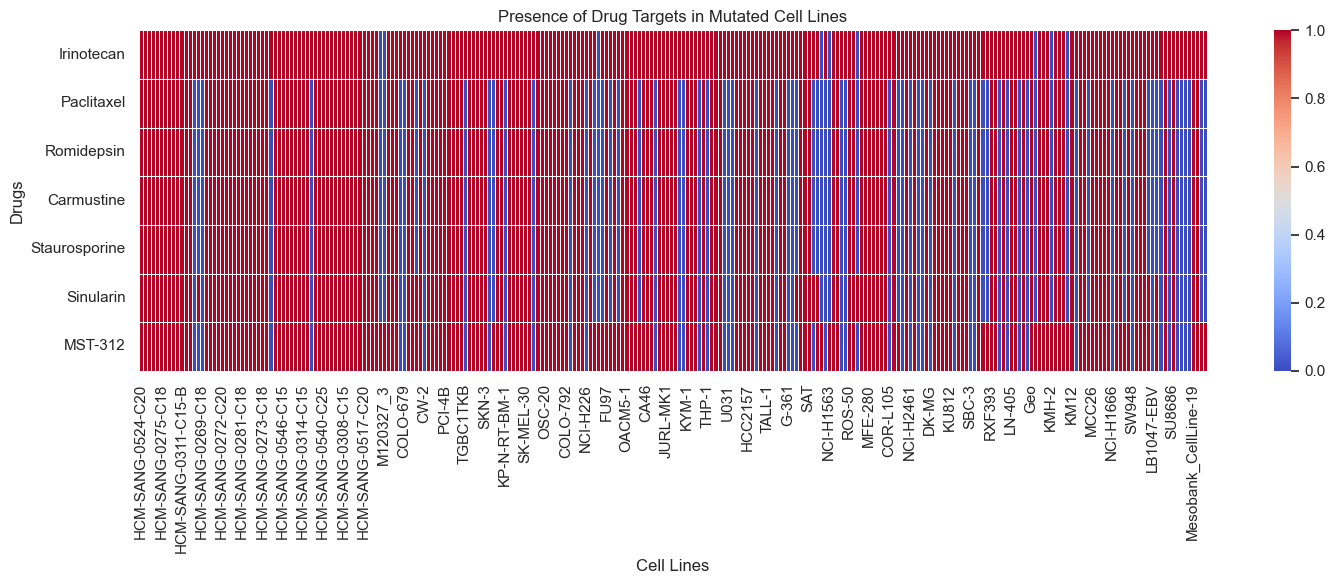

In [17]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Your drug-target mapping
drug_to_targets = {
    'Irinotecan': ['TP53', 'ATM'],
    'Paclitaxel': ['TP53'],
    'Romidepsin': ['TP53'],
    'Carmustine': ['TP53'],
    'Staurosporine': ['TP53'],
    'Sinularin': ['TP53', 'AKT1'],
    'MST-312': ['TP53', 'TERT']
}

# Step 1: Filter mutation data for only relevant genes
relevant_genes = set(g for targets in drug_to_targets.values() for g in targets)
filtered_mutation_data = mutation_data[mutation_data['gene_symbol'].isin(relevant_genes)]

# Step 2: Build drug-cell line matrix
cell_lines = filtered_mutation_data['Cell_line'].unique()
drug_cell_matrix = pd.DataFrame(0, index=drug_to_targets.keys(), columns=cell_lines)

# Step 3: Populate matrix
for drug, targets in drug_to_targets.items():
    for gene in targets:
        cell_lines_with_gene = filtered_mutation_data[filtered_mutation_data['gene_symbol'] == gene]['Cell_line'].unique()
        drug_cell_matrix.loc[drug, cell_lines_with_gene] = 1

# Step 4: Plot heatmap
plt.figure(figsize=(15, 6))
sns.heatmap(drug_cell_matrix, cmap="coolwarm", cbar=True, linewidths=0.5)
plt.title("Presence of Drug Targets in Mutated Cell Lines")
plt.xlabel("Cell Lines")
plt.ylabel("Drugs")
plt.xticks(rotation=90)
plt.tight_layout()
# Save the plot as PNG
plt.savefig("drug_target_presence_heatmap.png", dpi=300)
plt.show()


C:\Users\Abdul Rahman\AppData\Local\Temp\ipykernel_12512\1836368678.py:21: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=drug_target_counts.values, y=drug_target_counts.index, palette='coolwarm')


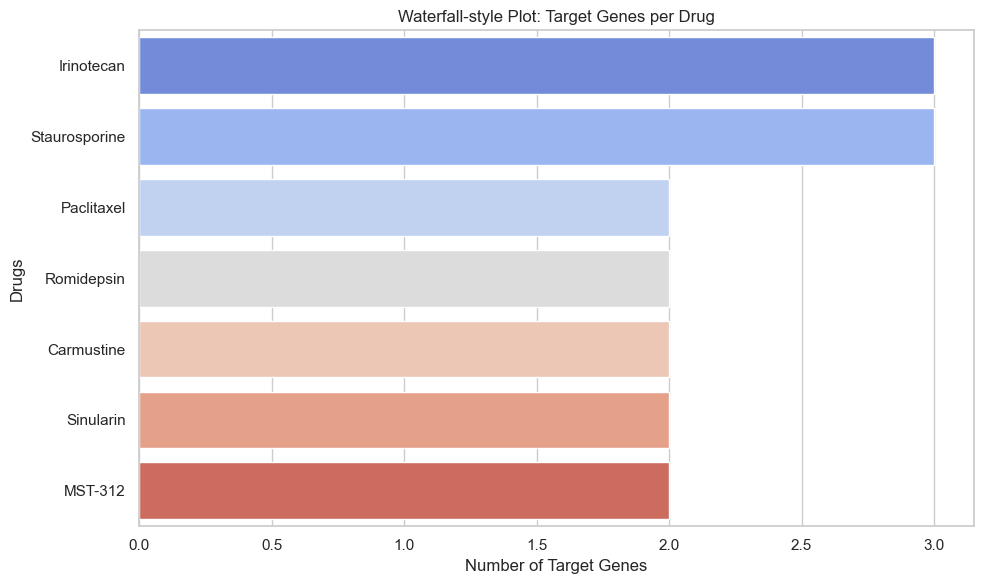

In [18]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Sample binary data for 7 drugs × 4 genes
data = {
    'Gene1': [1, 0, 1, 0, 1, 1, 0],
    'Gene2': [1, 1, 0, 0, 1, 0, 1],
    'Gene3': [0, 1, 1, 1, 0, 1, 0],
    'Gene4': [1, 0, 0, 1, 1, 0, 1]
}

# 7 drugs (index)
df = pd.DataFrame(data, index=['Irinotecan', 'Paclitaxel', 'Romidepsin', 'Carmustine', 'Staurosporine', 'Sinularin', 'MST-312'])

# Waterfall-style: count of target genes per drug
drug_target_counts = df.sum(axis=1).sort_values(ascending=False)

# Plot
plt.figure(figsize=(10, 6))
sns.barplot(x=drug_target_counts.values, y=drug_target_counts.index, palette='coolwarm')
plt.xlabel("Number of Target Genes")
plt.ylabel("Drugs")
plt.title("Waterfall-style Plot: Target Genes per Drug")
plt.tight_layout()
# Save plot as PNG
plt.savefig("waterfall_target_genes_per_drug.png", dpi=300)

plt.show()



In [19]:
import pandas as pd

# Expression data load karo
expr_df = pd.read_csv('rnaseq_all_20250117.csv')

# Gene symbol ko uppercase karo (matching ke liye)
expr_df['gene_symbol'] = expr_df['gene_symbol'].str.upper()

In [20]:
target_genes = ['NOTCH1', 'ARID1A', 'KMT2D', 'CREBBP', 'TP53', 'NF1', 'SMARCA4', 'ALK', 'LRP1B',
 'ERBB4', 'ASXL1', 'RUNX1', 'EP300', 'PIK3CA', 'FGFR3', 'APC', 'ROS1', 'EGFR',
 'BRAF', 'KMT2C', 'FGFR1', 'CDKN2B', 'KRAS', 'CDKN2A', 'ATM', 'SETD2', 'MTOR',
 'KEAP1', 'NFE2L2', 'MET', 'AKT1', 'ERBB2', 'PTEN', 'ZFHX3', 'RB1', 'MAP2K1',
 'STK11' ,'PTPRD', 'HRAS', 'CCND1', 'MYC', 'CUL3', 'CHD8', 'MGA', 'TERT' ,'FGF3',
 'FGF19', 'FGF4', 'RIT1']


In [21]:
filtered_expr_df = expr_df[expr_df['gene_symbol'].isin(target_genes)]


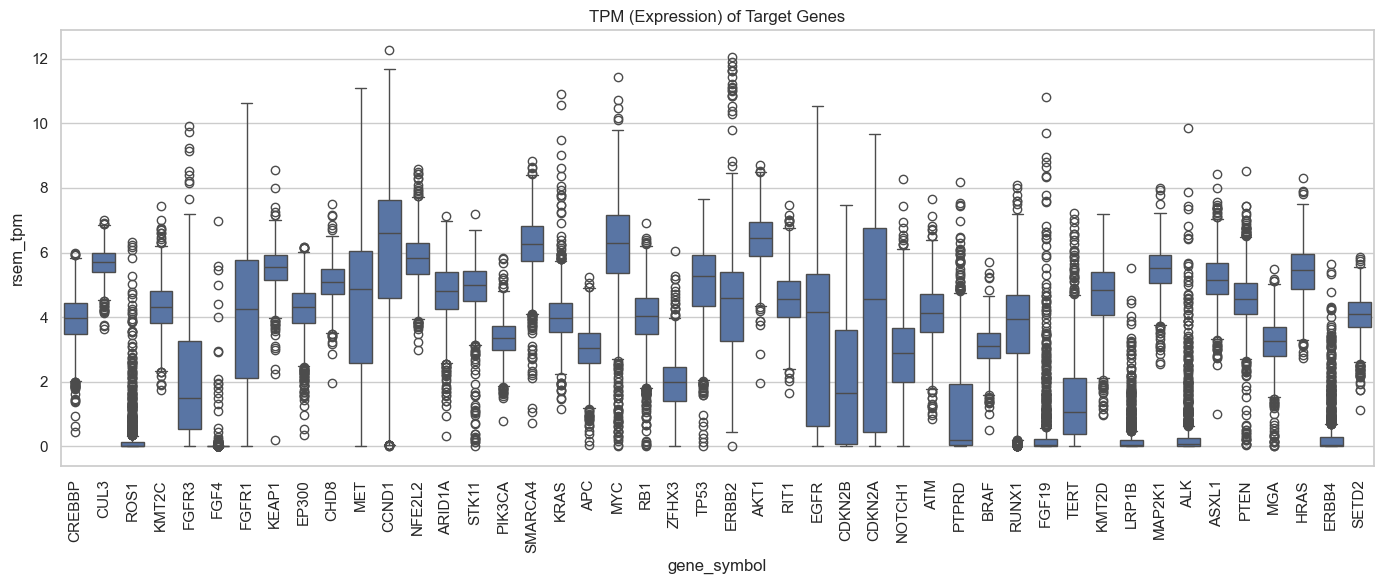

In [22]:
import seaborn as sns
import matplotlib.pyplot as plt

# Plot for top genes (you can also loop over each gene if needed)
plt.figure(figsize=(14, 6))
sns.boxplot(x='gene_symbol', y='rsem_tpm', data=filtered_expr_df)
plt.xticks(rotation=90)
plt.title('TPM (Expression) of Target Genes')
plt.ylabel('rsem_tpm')
plt.tight_layout()
plt.savefig("Gene_Expression of Top_Selected_drugs.png", dpi=300)
plt.show()